<a href="https://colab.research.google.com/github/renatachavezm22/Regresion-No-Lineal-y-Regresion-Logistica/blob/main/Actividad_7_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from pandas import Series, DataFrame
from datetime import date, time, datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import math
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from scipy.optimize import curve_fit

In [ ]:
Gastos = pd.read_csv("Gastos (SN).csv", index_col='Unnamed: 0')

## Eliminar Outliers

En este punto lo que se hizo fue generar una función que nos permitiera eliminar los valores atípicos de las funciones por el método de los quartiles. Se utilizó este método debido a que es el más estricto y que elimina la mayor cantidad de valores a diferencia del que es por varianza. 

Posteriormente, se aplicó la función a todos los DataFrame que se habían limpiado de valores nulos en actividades anteriores. La razón por la cual se eliminaron los valores atípicos, es para poder evitar que al momento de generar toda la estadística descriptiva, no se llegue a ver demasiado sesgada por este tipo de datos. 

In [ ]:
def outliers(df):
  numericas = df._get_numeric_data()
  y=numericas

  percentile25=y.quantile(0.25) 
  percentile75=y.quantile(0.75) 
  iqr= percentile75 - percentile25

  Limite_Superior_iqr= percentile75 + 1.5*iqr
  Limite_Inferior_iqr= percentile25 - 1.5*iqr

  data4_iqr= numericas[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]

  data5_iqr=data4_iqr.copy()
  data5_iqr=data5_iqr.fillna(round(data4_iqr.mean(),1))
  data5_iqr.isnull().sum()

  categoricas = df.drop(data5_iqr.columns, axis = 1)
  df1 = pd.concat([categoricas, data5_iqr], axis = 1)
  return df1

In [ ]:
Gastos = outliers(Gastos)

##Funciones

In [ ]:
Gastos1 = Gastos.copy()
Gastos['FECHA'] = pd.to_datetime(Gastos['FECHA'])
Gastos1['año'] = Gastos['FECHA'].dt.year
Gastos1[Gastos1['año']== 2021]

,FECHA,FOLIO,UUID,RFC,PROVEEDOR,TIPO_GASTO,DESCRIPCION,TIPO,STATUS,POLIZA,MP,TC,IMPORTE,IVA,RET ISR,RET IVA,TOTAL,TOTAL SAT,año
1871,2021-01-01,0001010100750847116902,71B4C8B9-8DAA-47CC-AD47-9DD90AA5AF6B,BNM840515VB1,"BANCO NACIONAL DE MEXICO, S.A.",COMISION BANCARIA,COMISION COBRADA,I,Vigente,0,PUE,1.0,490.00,78.40,0.0,0.0,568.4,568.4,2021
1872,2021-01-01,0001010100752163714102,B8AEDE83-CC76-404C-A611-6B5A87BA561F,BNM840515VB1,"BANCO NACIONAL DE MEXICO, S.A.",COMISION BANCARIA,COMISION COBRADA,I,Vigente,0,PUE,1.0,345.00,55.20,0.0,0.0,400.2,400.2,2021
1873,2021-01-01,211781,EAB26414-DD9A-4E8F-9F5C-05FE24D98E48,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006876 6/36 de 03/12/2...,I,Vigente,0,PPD,1.0,5551.38,105.70,0.0,0.0,6439.6,6439.6,2021
1874,2021-01-01,211782,C16F79B5-FB35-4BFC-AF84-708B24F500BB,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006877 6/36 de 03/12/2...,I,Vigente,0,PPD,1.0,5551.98,105.70,0.0,0.0,6440.3,6440.3,2021
1875,2021-01-01,9231013,26928ED7-4CBE-4102-99A5-DE5CF2D92698,ANE140618P37,Servicios Comerciales Amazon México S. de R.L....,NO DEDUCIBLE,"Pagani, Coche de Control Remoto Escala 1:24, C...",I,Vigente,0,PUE,1.0,0.00,0.00,0.0,0.0,0.0,599.0,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3384,2021-12-01,127043,83F82167-0D14-144E-9D76-045C95F25DDD,PGM881128QIA,"PROMOCIONES GRAFICAS MEXICANAS, S.A. DE C.V.",PUBLICIDAD,Pago,P,Vigente,0,PUE,1.0,0.00,0.00,0.0,0.0,0.0,0.0,2021
3385,2021-12-01,11740,B1C60AE0-02BC-4A33-9513-A280F72B5D06,SME0510105C7,SPECTRIS MEXICO S DE RL DE CV,COMPRAS,INSULATED T/C WIRE,I,Vigente,0,PUE,1.0,0.00,0.00,0.0,0.0,0.0,0.0,2021
3386,2021-12-01,1092957089,255F4A25-5753-4208-8F6B-0B59E5AE4741,BMN930209927,BANCO MERCANTIL DEL NORTE SA INSTITUCION DE BA...,COMISION BANCARIA,SERVICIOS BANCARIOS,I,Vigente,0,PUE,1.0,1054.90,705.58,0.0,0.0,1190.7,1324.8,2021
3387,2021-12-01,747826,D8226E4F-9241-44C3-86A4-CDE9BC932528,BIN940223KE0,"BANCO INVEX, S.A., INSTITUCION DE BANCA MULTIP...",COMISION BANCARIA,COMISIONES E INTERESES,I,Vigente,0,PUE,1.0,0.00,0.00,0.0,0.0,0.0,0.0,2021


In [ ]:
Gastos2020 = pd.DataFrame()
Gastos2021 = pd.DataFrame()
Gastos2022 = pd.DataFrame()
Gastos2023 = pd.DataFrame()
Gastos2020 = Gastos1[Gastos1['año']== 2020]
Gastos2021 = Gastos1[Gastos1['año']== 2021]
Gastos2022 = Gastos1[Gastos1['año']== 2022]
Gastos2023 = Gastos1[Gastos1['año']== 2023]

In [ ]:
def correlacion(df, dependiente, independiente): 
  df1 = pd.DataFrame()
  df1 = df.copy()
  Vars_Indep= df[[independiente]]
  Var_Dep= df[dependiente]
  model= LinearRegression()
  model.fit(X=Vars_Indep, y=Var_Dep)
  y_pred= model.predict(X=df[[independiente]])
  df1.insert(0, 'Predicciones', y_pred)
  plt.scatter(x=independiente, y=dependiente, color="blue", data=df1)
  plt.scatter(x=independiente, y='Predicciones', color="red", data=df1)
  plt.ylabel(dependiente)
  plt.xlabel(independiente)
  plt.show()
  modeloMat = model.__dict__
  modeloMat = pd.DataFrame(modeloMat)
  print("El modelo matemático es: y = %fx + %f" % (modeloMat['coef_'].values[0], modeloMat['intercept_'].values[0]))
  coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
  print("El coeficiente de determinación es: ", coef_Deter)
  coef_Correl=np.sqrt(coef_Deter)
  print("El coeficiente de correlación es: ", coef_Correl)
  return (coef_Deter)

In [ ]:
def  func1 (x, a, b, c):
     return a*x**2 + b*x + c

In [ ]:
def corrNoLineal (df):
  Vars_Indep= df[['IVA']]
  Var_Dep= df['TOTAL']
  x= Vars_Indep
  y= Var_Dep
  parametros, covs= curve_fit(func1, df['IVA'], df['TOTAL'])
  parametros, _ = curve_fit(func1, df['IVA'], df['TOTAL'])
  a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
  yfit1 = a * x ** 2 + b * x + c
  plt.plot(x, y, 'bo', label="y-original")
  plt.plot(x, yfit1, label="y=a*x^2+b*x+c")
  plt.xlabel('x')
  plt.ylabel('y')
  plt.legend(loc='best', fancybox=True, shadow=True)
  plt.grid(True)
  plt.show() 
  R2 = r2_score(y, yfit1) 
  print("La R2 es: ", R2)
  return R2

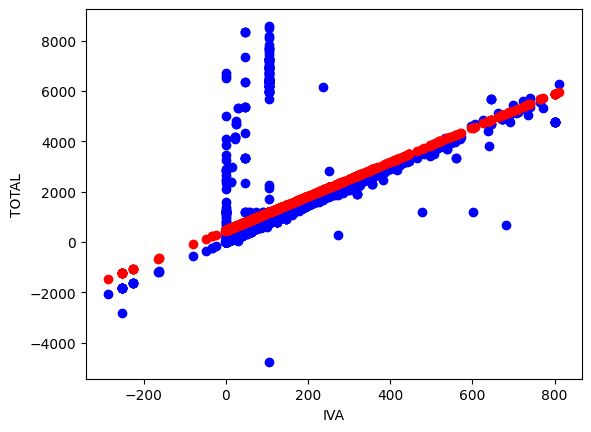

El modelo matemático es: y = 6.796369x + 457.292607
El coeficiente de determinación es:  0.35351228856935124
El coeficiente de correlación es:  0.5945689939522169


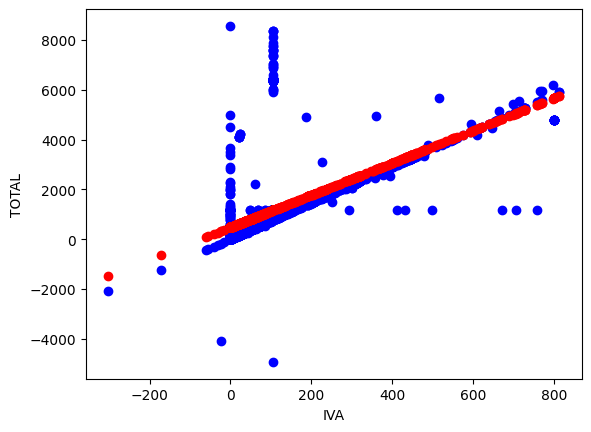

El modelo matemático es: y = 6.467991x + 476.467690
El coeficiente de determinación es:  0.42291574153640976
El coeficiente de correlación es:  0.6503197225491548


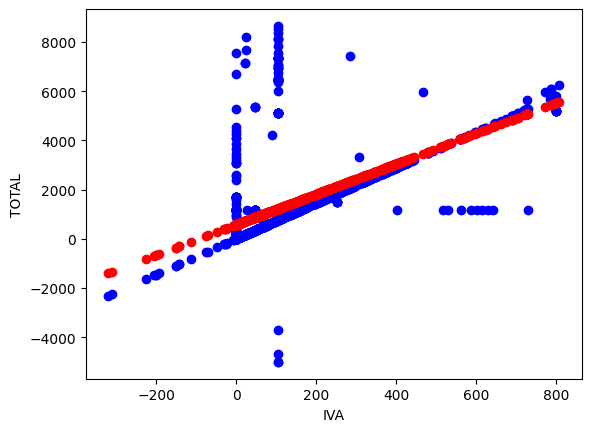

El modelo matemático es: y = 6.179758x + 579.540836
El coeficiente de determinación es:  0.3591805145331475
El coeficiente de correlación es:  0.5993167063691346


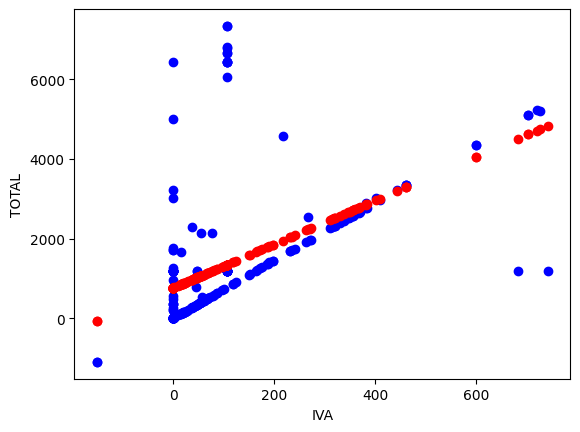

El modelo matemático es: y = 5.471921x + 763.704648
El coeficiente de determinación es:  0.2730777139420074
El coeficiente de correlación es:  0.5225683820726311


In [ ]:
lineal = []
coef_Deter2020 = correlacion(Gastos2020, 'TOTAL', 'IVA')
lineal.append(coef_Deter2020)
coef_Deter2021 = correlacion(Gastos2021, 'TOTAL', 'IVA')
lineal.append(coef_Deter2021)
coef_Deter2022 = correlacion(Gastos2022, 'TOTAL', 'IVA')
lineal.append(coef_Deter2022)
coef_Deter2023 = correlacion(Gastos2023, 'TOTAL', 'IVA')
lineal.append(coef_Deter2023)

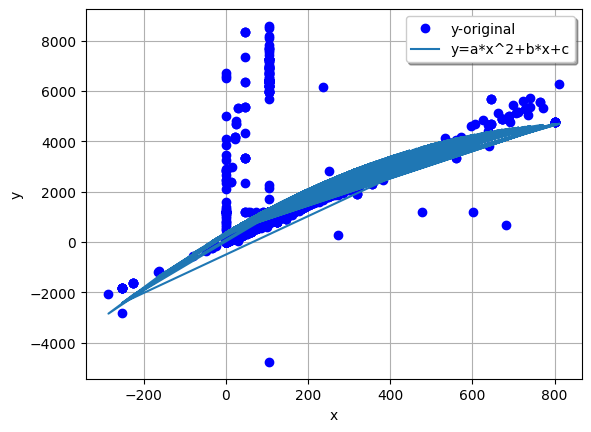

La R2 es:  0.36908834585192385


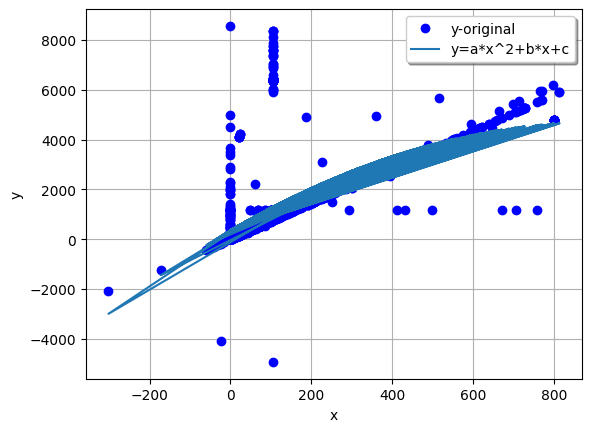

La R2 es:  0.4372117311159085


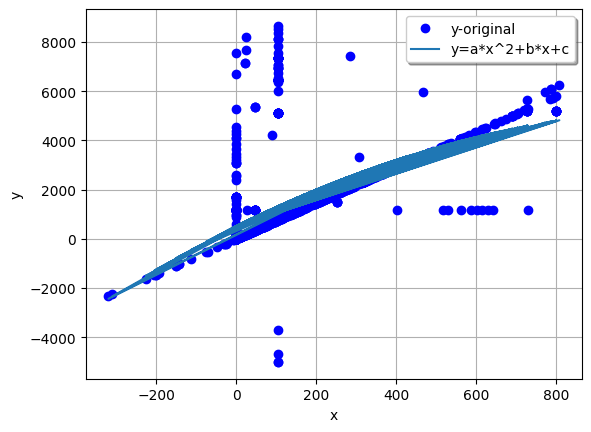

La R2 es:  0.36587454506644657


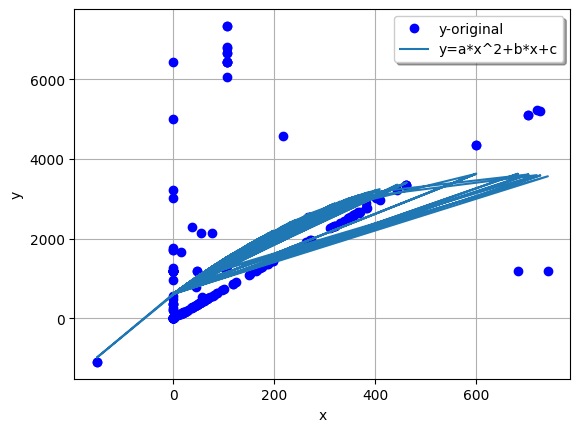

La R2 es:  0.2986316385399327


In [ ]:
cuadr = []
coef_Deter2020 = corrNoLineal(Gastos2020)
cuadr.append(coef_Deter2020)
coef_Deter2021 = corrNoLineal(Gastos2021)
cuadr.append(coef_Deter2021)
coef_Deter2022 = corrNoLineal(Gastos2022)
cuadr.append(coef_Deter2022)
coef_Deter2023 = corrNoLineal(Gastos2023)
cuadr.append(coef_Deter2023)

In [ ]:
tabla = pd.DataFrame()
anios = ['2020', '2021', '2022', '2023']
tabla['Años']=anios
tabla['Función lineal']=lineal
tabla['Función cuadrática']=cuadr
tabla = tabla.set_index('Años')
tabla

,Función lineal,Función cuadrática
Años,,
2020,0.353512,0.369088
2021,0.422916,0.437212
2022,0.359181,0.365875
2023,0.273078,0.298632
